Imports

## Imports



In [1]:
#data cleaning and preprocessing
import numpy as np
import pandas as pd
import sklearn.preprocessing
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Data Manipulation
import numpy as np
import pandas as pd
from scipy import stats

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

# Machine Learning Models
from sklearn.linear_model import SGDRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor

# Evaluation Metrics
from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error ,r2_score

from random_forest_util import tune_random_forest
from random_forest_util import print_RF
from random_forest_util import plot_learning_curve


from random_forest_util import tune_random_forest, print_RF, plot_learning_curve


plt.rcParams['figure.figsize'] = (5.0, 5.0)
plt.rcParams['image.interpolation'] = 'nearest'

In [2]:
import os
print(os.listdir())
print_RF()


['utility.py', '.dist', 'yuan.ipynb', '__pycache__', 'random_forest_util.py', '.gitignore', 'sports.csv', '[STINTSY]_Machine_Learning_Project.ipynb', 'yuan copy.ipynb', '.git', 'core_ML_Model.py', '.idea']
Random Forest Regressor TEST


In [3]:
# Import df from csv file
df = pd.read_csv('sports.csv')
df.isnull().sum()

uuid                      0
current_minute            0
home_score                0
away_score                0
home_yellow_cards         0
away_yellow_cards         0
home_red_cards            0
away_red_cards            0
home_attacks              0
away_attacks              0
home_dangerous_attacks    0
away_dangerous_attacks    0
home_corners              0
away_corners              0
home_off_target           0
away_off_target           0
home_on_target            0
away_on_target            0
home_possession           0
away_possession           0
final_delta               0
dtype: int64

In [4]:
df = df.reset_index(col_level=0)
df = df.drop('uuid', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   index                   7000 non-null   int64
 1   current_minute          7000 non-null   int64
 2   home_score              7000 non-null   int64
 3   away_score              7000 non-null   int64
 4   home_yellow_cards       7000 non-null   int64
 5   away_yellow_cards       7000 non-null   int64
 6   home_red_cards          7000 non-null   int64
 7   away_red_cards          7000 non-null   int64
 8   home_attacks            7000 non-null   int64
 9   away_attacks            7000 non-null   int64
 10  home_dangerous_attacks  7000 non-null   int64
 11  away_dangerous_attacks  7000 non-null   int64
 12  home_corners            7000 non-null   int64
 13  away_corners            7000 non-null   int64
 14  home_off_target         7000 non-null   int64
 15  away_off_target      

### Data Cleaning

In [5]:
# Define numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns

#handle different data representation of numbers
# Replace commas with dots in numeric columns
for col in numeric_cols:
    df[col] = df[col].astype(str).str.replace(',', '.').astype(float)

# Display the first few rows of the cleaned data
print(df.head())
df.isnull().sum()

   index  current_minute  home_score  away_score  home_yellow_cards  \
0    0.0            94.0         1.0         2.0                0.0   
1    1.0            91.0         2.0         0.0                0.0   
2    2.0             3.0         0.0         0.0                0.0   
3    3.0            17.0         0.0         0.0                1.0   
4    4.0            76.0         1.0         0.0                1.0   

   away_yellow_cards  home_red_cards  away_red_cards  home_attacks  \
0                0.0             0.0             0.0          39.0   
1                0.0             0.0             0.0           0.0   
2                0.0             0.0             0.0           3.0   
3                0.0             0.0             0.0          41.0   
4                0.0             0.0             0.0          69.0   

   away_attacks  ...  away_dangerous_attacks  home_corners  away_corners  \
0          45.0  ...                    26.0           4.0           1.0   


index                     0
current_minute            0
home_score                0
away_score                0
home_yellow_cards         0
away_yellow_cards         0
home_red_cards            0
away_red_cards            0
home_attacks              0
away_attacks              0
home_dangerous_attacks    0
away_dangerous_attacks    0
home_corners              0
away_corners              0
home_off_target           0
away_off_target           0
home_on_target            0
away_on_target            0
home_possession           0
away_possession           0
final_delta               0
dtype: int64

In [6]:
# Removing duplicate uuids
numeric_data = df.select_dtypes(include=[np.number])
imputer = SimpleImputer(strategy='mean')
imputed_numeric_data = pd.DataFrame(imputer.fit_transform(numeric_data), columns=numeric_data.columns)
imputed_data = df.copy()
imputed_data[numeric_data.columns] = imputed_numeric_data
# Display the first few rows of the data after removing duplicates
print(imputed_data.head())


   index  current_minute  home_score  away_score  home_yellow_cards  \
0    0.0            94.0         1.0         2.0                0.0   
1    1.0            91.0         2.0         0.0                0.0   
2    2.0             3.0         0.0         0.0                0.0   
3    3.0            17.0         0.0         0.0                1.0   
4    4.0            76.0         1.0         0.0                1.0   

   away_yellow_cards  home_red_cards  away_red_cards  home_attacks  \
0                0.0             0.0             0.0          39.0   
1                0.0             0.0             0.0           0.0   
2                0.0             0.0             0.0           3.0   
3                0.0             0.0             0.0          41.0   
4                0.0             0.0             0.0          69.0   

   away_attacks  ...  away_dangerous_attacks  home_corners  away_corners  \
0          45.0  ...                    26.0           4.0           1.0   


## EDA

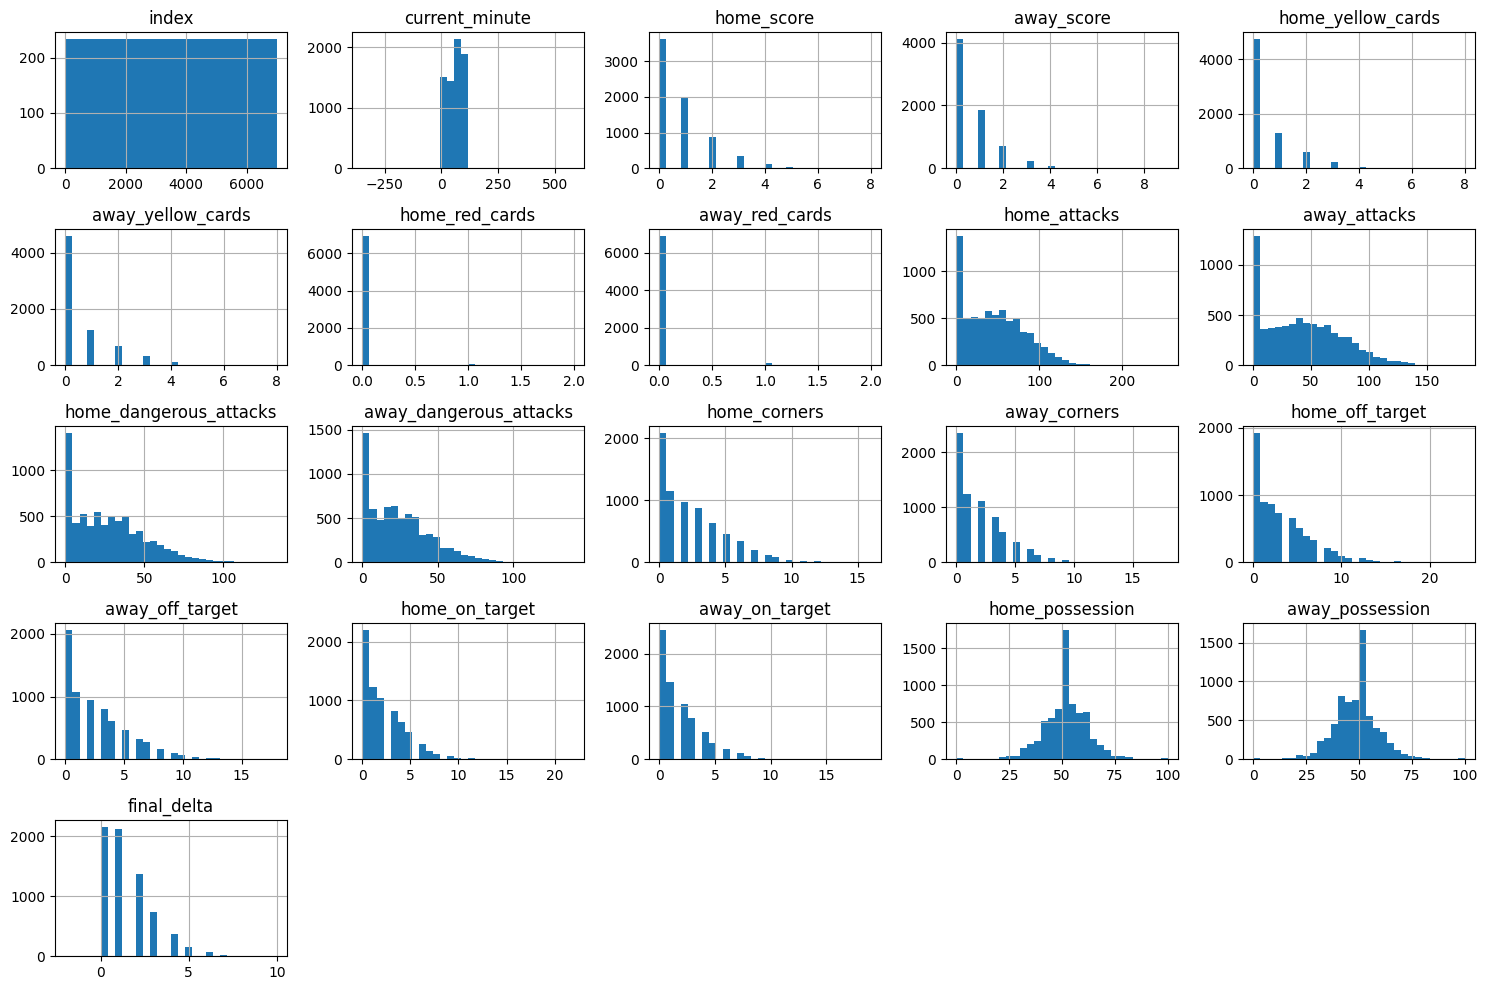

In [7]:

#show distribution of variables
# Plot histograms for each numeric column
imputed_data.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

outliers

In [8]:
# Handling outliers

# Remove outliers
Q1 = imputed_data[numeric_cols].quantile(0.25)
Q3 = imputed_data[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Define a mask for outliers
mask = (imputed_data[numeric_cols] < (Q1 - 1.5 * IQR)) | (imputed_data[numeric_cols] > (Q3 + 1.5 * IQR))
imputed_data_no_outliers = imputed_data[~mask.any(axis=1)]

# Transform outliers using logarithmic transformation
imputed_data_log_transformed = imputed_data.copy()
imputed_data_log_transformed[numeric_cols] = imputed_data_log_transformed[numeric_cols].apply(lambda x: np.log1p(x))

# Impute outliers by replacing them with the median
imputed_data_imputed_outliers = imputed_data.copy()
for col in numeric_cols:
    median = imputed_data_imputed_outliers[col].median()
    imputed_data_imputed_outliers[col] = np.where(mask[col], median, imputed_data_imputed_outliers[col])

# Display the first few rows of each method
print("Data after removing outliers:")
print(imputed_data_no_outliers.head())

print("\nData after logarithmic transformation:")
print(imputed_data_log_transformed.head())

print("\nData after imputing outliers:")
print(imputed_data_imputed_outliers.head())

Data after removing outliers:
   index  current_minute  home_score  away_score  home_yellow_cards  \
0    0.0            94.0         1.0         2.0                0.0   
1    1.0            91.0         2.0         0.0                0.0   
2    2.0             3.0         0.0         0.0                0.0   
3    3.0            17.0         0.0         0.0                1.0   
4    4.0            76.0         1.0         0.0                1.0   

   away_yellow_cards  home_red_cards  away_red_cards  home_attacks  \
0                0.0             0.0             0.0          39.0   
1                0.0             0.0             0.0           0.0   
2                0.0             0.0             0.0           3.0   
3                0.0             0.0             0.0          41.0   
4                0.0             0.0             0.0          69.0   

   away_attacks  ...  away_dangerous_attacks  home_corners  away_corners  \
0          45.0  ...                    26.0  

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


                           index  current_minute  home_score  away_score  \
index                   1.000000        0.010943   -0.007075   -0.007072   
current_minute          0.010943        1.000000    0.390990    0.347159   
home_score             -0.007075        0.390990    1.000000    0.131241   
away_score             -0.007072        0.347159    0.131241    1.000000   
home_yellow_cards       0.001849        0.303318    0.102180    0.149881   
away_yellow_cards      -0.006898        0.324746    0.140845    0.107793   
home_red_cards          0.004997        0.070343    0.029133    0.065932   
away_red_cards          0.017643        0.091434    0.066394   -0.009303   
home_attacks           -0.008359        0.612603    0.278375    0.219233   
away_attacks           -0.006839        0.615030    0.254545    0.253717   
home_dangerous_attacks -0.005758        0.588180    0.275081    0.205841   
away_dangerous_attacks -0.005147        0.577481    0.210196    0.286067   
home_corners

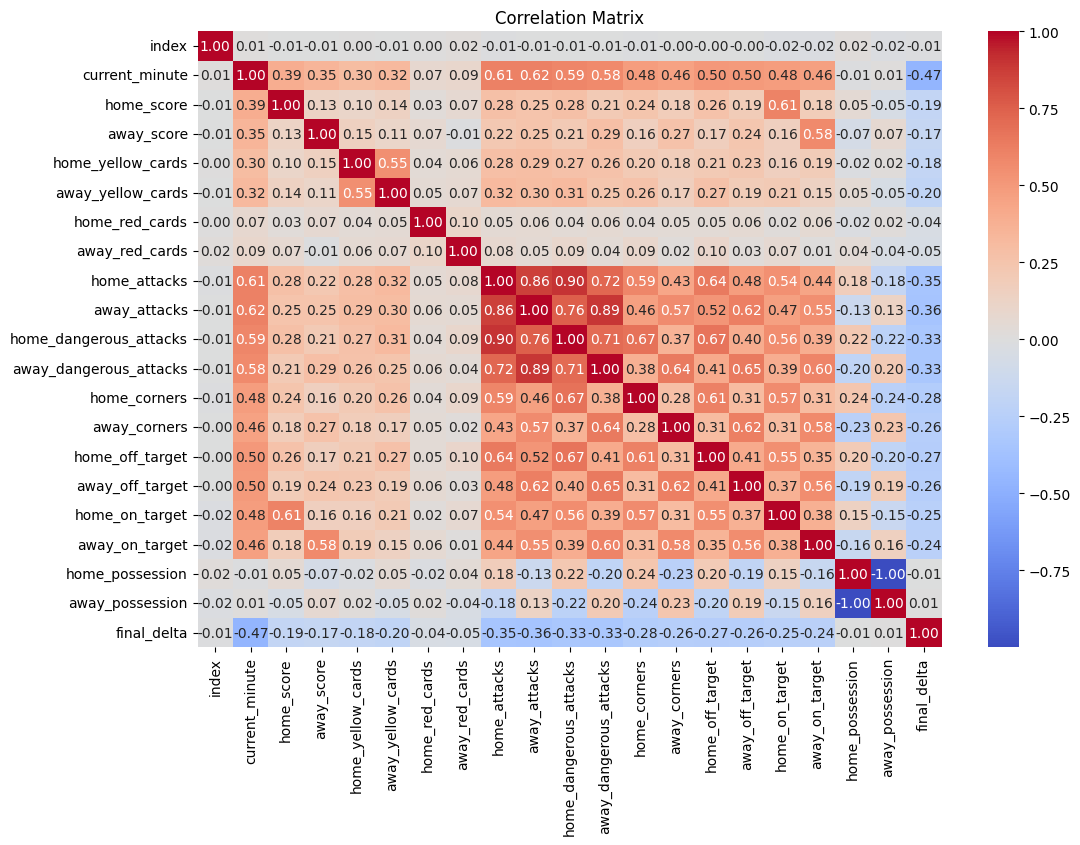

In [9]:
#correlation matrix
# Compute the correlation matrix
correlation_matrix = imputed_data[numeric_cols].corr()

# Display the correlation matrix
print(correlation_matrix)

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()
# END: correlation matrix

Normalization

In [10]:

# Assuming 'imputed_data' is the training data and 'imputed_data_no_outliers' is the test data

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform it
normalized_train_data = pd.DataFrame(scaler.fit_transform(imputed_data[numeric_cols]), columns=numeric_cols)

# Transform the test data using the same scaler
normalized_test_data = pd.DataFrame(scaler.transform(imputed_data_no_outliers[numeric_cols]), columns=numeric_cols)

# Display the first few rows of the normalized training and test data
print("Normalized Training Data:")
print(normalized_train_data.head())

print("\nNormalized Test Data:")
print(normalized_test_data.head())

Normalized Training Data:
      index  current_minute  home_score  away_score  home_yellow_cards  \
0  0.000000        0.474758       0.125    0.222222              0.000   
1  0.000143        0.471536       0.250    0.000000              0.000   
2  0.000286        0.377014       0.000    0.000000              0.000   
3  0.000429        0.392052       0.000    0.000000              0.125   
4  0.000572        0.455424       0.125    0.000000              0.125   

   away_yellow_cards  home_red_cards  away_red_cards  home_attacks  \
0                0.0             0.0             0.0      0.152941   
1                0.0             0.0             0.0      0.000000   
2                0.0             0.0             0.0      0.011765   
3                0.0             0.0             0.0      0.160784   
4                0.0             0.0             0.0      0.270588   

   away_attacks  ...  away_dangerous_attacks  home_corners  away_corners  \
0      0.245902  ...            

Feature Selection

In [11]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif

# Assuming 'imputed_data' is the dataset and 'final_delta' is the target variable

# Separate the features and the target variable
X = imputed_data[numeric_cols].drop(columns=['final_delta'])
y = imputed_data['final_delta']

# Apply SelectKBest with chi2
# Ensure that the input features X are non-negative
X_non_negative = X.clip(lower=0)

chi2_selector = SelectKBest(chi2, k='all')
X_kbest_chi2 = chi2_selector.fit_transform(X_non_negative, y)
chi2_scores = chi2_selector.scores_

# Apply SelectKBest with ANOVA F-test
anova_selector = SelectKBest(f_classif, k='all')
X_kbest_anova = anova_selector.fit_transform(X, y)
anova_scores = anova_selector.scores_

# Create a DataFrame to display the scores
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'Chi2 Score': chi2_scores,
    'ANOVA F-test Score': anova_scores
})

# Sort the DataFrame by Chi2 Score and ANOVA F-test Score
feature_scores = feature_scores.sort_values(by=['Chi2 Score', 'ANOVA F-test Score'], ascending=False)

# Display the feature scores
print(feature_scores)

                   Feature    Chi2 Score  ANOVA F-test Score
1           current_minute  34409.155075          169.886789
8             home_attacks  24613.580651           83.771861
9             away_attacks  23856.625159           88.665081
0                    index  19810.946865            1.415672
10  home_dangerous_attacks  15498.673985           76.258900
11  away_dangerous_attacks  13562.115605           73.480308
14         home_off_target   1657.832713           45.779373
12            home_corners   1472.550936           52.253912
15         away_off_target   1452.070061           44.660819
13            away_corners   1179.094429           43.527644
16          home_on_target   1107.258170           39.695140
17          away_on_target    941.868115           36.428889
5        away_yellow_cards    517.653694           26.189515
4        home_yellow_cards    420.340277           22.303062
2               home_score    374.212915           22.457724
3               away_sco

Feature Selection and Encoding

In [12]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Define categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Initialize the OneHotEncoder for categorical features
onehot_encoder = OneHotEncoder(sparse_output=False)

# Fit and transform the categorical features
encoded_features = onehot_encoder.fit_transform(imputed_data[categorical_cols])

# Convert the encoded features to a DataFrame
encoded_features_df = pd.DataFrame(encoded_features, columns=onehot_encoder.get_feature_names_out(categorical_cols))

# Initialize the LabelEncoder for the target variable
label_encoder = LabelEncoder()

# Fit and transform the target variable
encoded_labels = label_encoder.fit_transform(imputed_data['final_delta'])

# Display the first few rows of the encoded features and labels
print("Encoded Features:")
print(encoded_features_df.head())

print("\nEncoded Labels:")
print(encoded_labels[:5])


Encoded Features:
Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4]

Encoded Labels:
[3 3 6 4 2]


Initial Model Training

In [13]:
X = df.drop("final_delta", axis=1)
y = df['final_delta']

print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

Shape of X: (7000, 20)
Shape of y: (7000,)


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 ,random_state=42)
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")

Shape of X_train: (4900, 20)
Shape of X_test: (2100, 20)


In [15]:
# Create the random forest regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42, verbose=True, oob_score=True)

# Fit the model
rf_regressor.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.4s


RandomForestRegressor(oob_score=True, random_state=42, verbose=True)

In [16]:
# Access the depths of all trees in the Random Forest
tree_depths = [tree.tree_.max_depth for tree in rf_regressor.estimators_]

# Print the depths of d trees
print("Tree depths:", tree_depths)

# solve and print the avg depth of the trees
average_depth = sum(tree_depths) / len(tree_depths)
print("Average depth of trees:", average_depth)

Tree depths: [31, 31, 29, 32, 35, 35, 30, 37, 29, 25, 28, 29, 29, 26, 26, 26, 30, 27, 27, 27, 31, 31, 30, 32, 24, 27, 32, 27, 32, 28, 32, 26, 31, 31, 29, 28, 26, 30, 28, 34, 33, 35, 31, 27, 25, 30, 36, 24, 36, 28, 32, 28, 29, 29, 36, 31, 26, 28, 31, 31, 37, 32, 28, 30, 28, 27, 32, 31, 32, 30, 34, 29, 29, 27, 32, 27, 42, 28, 26, 29, 27, 31, 28, 32, 30, 29, 29, 30, 27, 30, 30, 26, 34, 28, 30, 38, 30, 32, 32, 34]
Average depth of trees: 30.01


In [17]:
# Evaluate on training data
y_train_pred = rf_regressor.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

print(f"Train MSE: {train_mse}")
print(f"Train RMSE: {train_rmse}")
print(f"Train R²: {train_r2}")

Train MSE: 0.22085642857142856
Train RMSE: 0.46995364513048365
Train R²: 0.8899189902053828


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


In [18]:
# Evaluate on test data )
y_pred = rf_regressor.predict(X_test)
test_mse = mean_squared_error(y_test, y_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_pred)

print(f"Test MSE: {test_mse}")
print(f"Test RMSE: {test_rmse}")
print(f"Test R²: {test_r2}")

Test MSE: 1.5582133333333332
Test RMSE: 1.2482841556846476
Test R²: 0.23219100717459085


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


### Error Analysis

OOB (Data Augmentation) since i dont want to split my data further

In [19]:
#visualize the errors (from MSE, RMSE, R2)
# Print train MSE, RMSE, R²
print("Evaluating Training Data Results:")
print(f"Train MSE: {train_mse}")
print(f"Train RMSE: {train_rmse}")
print(f"Train R²: {train_r2}")

#will use OOB kasi validation set is not necessary since ensemble learning si RF
print("Evaluting Test Data Results:")
print(f"Test MSE: {test_mse}")
print(f"Test RMSE: {test_rmse}")
print(f"Test R²: {test_r2}")

# rf_regressor = RandomForestRegressor(n_estimators=100, 
#                                      random_state=42, 
#                                      oob_score=True, 
#                                      verbose=True)
rf_regressor.fit(X_train, y_train)
oob_score = rf_regressor.oob_score_

# If you also want to compute OOB prediction error (MSE or RMSE for OOB samples):
oob_predictions = rf_regressor.oob_prediction_
oob_mse = mean_squared_error(y_train, oob_predictions)
oob_rmse = np.sqrt(oob_mse)
oob_r2 = r2_score(y_train, oob_predictions)
print("\nEvaluting Out-Of-Bag(OOB) Data Results:")
print(f"OOB MSE: {oob_mse}")
print(f"OOB RMSE: {oob_rmse}")
print(f"OOB R²: {oob_r2}")
print(f"\nOOB Score: {oob_score}")

#residual plot

#actual vs predicted plot

Evaluating Training Data Results:
Train MSE: 0.22085642857142856
Train RMSE: 0.46995364513048365
Train R²: 0.8899189902053828
Evaluting Test Data Results:
Test MSE: 1.5582133333333332
Test RMSE: 1.2482841556846476
Test R²: 0.23219100717459085


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.3s



Evaluting Out-Of-Bag(OOB) Data Results:
OOB MSE: 1.592945804487887
OOB RMSE: 1.2621195682216035
OOB R²: 0.20603133972433407

OOB Score: 0.20603133972433407


Feature importances

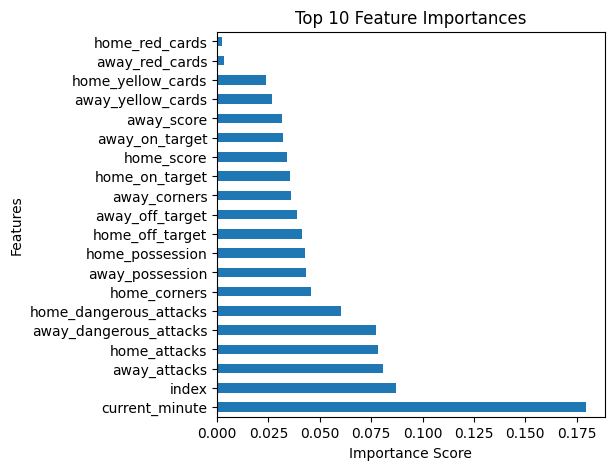

current_minute            0.179689
index                     0.087025
away_attacks              0.080593
home_attacks              0.078423
away_dangerous_attacks    0.077294
home_dangerous_attacks    0.060174
home_corners              0.045937
away_possession           0.043153
home_possession           0.042767
home_off_target           0.041396
away_off_target           0.038707
away_corners              0.036050
home_on_target            0.035555
home_score                0.033927
away_on_target            0.031838
away_score                0.031436
away_yellow_cards         0.026696
home_yellow_cards         0.023688
away_red_cards            0.003523
home_red_cards            0.002130
dtype: float64


In [20]:
#identify difficult to predict data points
#feature importance
plt.figure()
# Applying the ExtraTreesRegressor for feature importance
model = ExtraTreesRegressor()
model.fit(X, y)

# Extracting feature importances
feat_importances = pd.Series(model.feature_importances_, index=X.columns)

# Plotting the top 10 important features
feat_importances.nlargest(20).plot(kind='barh')
plt.title("Top 10 Feature Importances")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

# Displaying the feature importances for reference
print(feat_importances.sort_values(ascending=False))

Bias-Variance Analysis

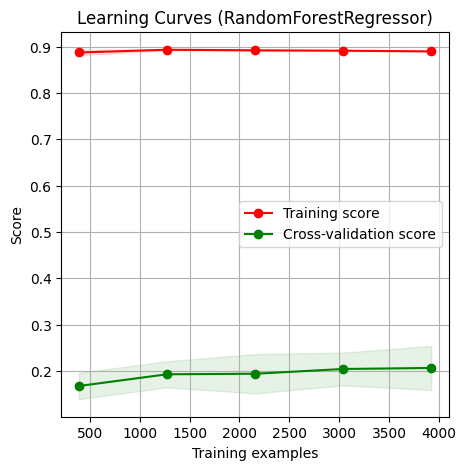

In [21]:
from random_forest_util import plot_learning_curve
# Initialize your model
rf_regressor = RandomForestRegressor(random_state=42)

# Plot learning curve for RandomForestRegressor
plot_learning_curve(rf_regressor, "Learning Curves (RandomForestRegressor)", X_train, y_train, cv=5, n_jobs=-1)
plt.show()

# Get training and cross-validation scores
# from sklearn.model_selection import learning_curve
# train_sizes, train_scores, test_scores = learning_curve(rf_regressor, X_train, y_train, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5))

# print("Training scores:\n", train_scores)
# print("Cross-validation scores:\n", test_scores)


### Improving Model Performance

Feature Engineering

drop low important features

In [22]:
# Drop low important features 'home_red_cards' and 'away_red_cards'
X = X.drop(columns=['home_red_cards', 'away_red_cards'])

# Update the training and test sets
X_train = X_train.drop(columns=['home_red_cards', 'away_red_cards'])
X_test = X_test.drop(columns=['home_red_cards', 'away_red_cards'])

print(f"Updated shape of X: {X.shape}")
print(f"Updated shape of X_train: {X_train.shape}")
print(f"Updated shape of X_test: {X_test.shape}")

Updated shape of X: (7000, 18)
Updated shape of X_train: (4900, 18)
Updated shape of X_test: (2100, 18)


interaction of features, create ratio features and time based features

In [23]:
# # Create interaction features
# df['possession_diff'] = df['home_possession'] - df['away_possession']
# df['score_diff'] = df['home_score'] - df['away_score']

# # Add ratio features
# df['attack_ratio'] = df['home_attacks'] / (df['home_attacks'] + df['away_attacks'])
# df['dangerous_attack_ratio'] = df['home_dangerous_attacks'] / (df['home_dangerous_attacks'] + df['away_dangerous_attacks'])

# # Create time-based features
# df['time_bucket'] = pd.cut(df['current_minute'], bins=[0, 30, 60, 90, 120], labels=['early', 'mid', 'late', 'extra'])
# Temporal Context Features
# 2. Interaction Features
# Calculate the difference in possession between home and away teams
df['possession_diff'] = df['home_possession'] - df['away_possession']

# Calculate the difference in score between home and away teams
df['score_diff'] = df['home_score'] - df['away_score']

# Calculate attack ratio (home team attacks relative to total attacks)
df['attack_ratio'] = df['home_attacks'] / (df['home_attacks'] + df['away_attacks'])

# Calculate dangerous attack ratio (home team dangerous attacks relative to total dangerous attacks)
df['dangerous_attack_ratio'] = df['home_dangerous_attacks'] / (df['home_dangerous_attacks'] + df['away_dangerous_attacks'])

# 3. Create time-based features (Categorize the game into time buckets)
df['time_bucket'] = pd.cut(df['current_minute'], bins=[0, 30, 60, 90, 120], labels=['early', 'mid', 'late', 'extra'])

# 4. Derived Features
# Calculate goal differential
df['goal_differential'] = df['home_score'] - df['away_score']

# Optional: Create a momentum index (could be a weighted metric based on possession and dangerous attacks)
df['momentum_index'] = (df['home_possession'] * df['home_dangerous_attacks']) - (df['away_possession'] * df['away_dangerous_attacks'])

# 5. Display the first few rows to check the created features
print(df.head())



   index  current_minute  home_score  away_score  home_yellow_cards  \
0    0.0            94.0         1.0         2.0                0.0   
1    1.0            91.0         2.0         0.0                0.0   
2    2.0             3.0         0.0         0.0                0.0   
3    3.0            17.0         0.0         0.0                1.0   
4    4.0            76.0         1.0         0.0                1.0   

   away_yellow_cards  home_red_cards  away_red_cards  home_attacks  \
0                0.0             0.0             0.0          39.0   
1                0.0             0.0             0.0           0.0   
2                0.0             0.0             0.0           3.0   
3                0.0             0.0             0.0          41.0   
4                0.0             0.0             0.0          69.0   

   away_attacks  ...  home_possession  away_possession  final_delta  \
0          45.0  ...             48.0             52.0          1.0   
1         

address redundant features

In [24]:
# Ensure feature_names corresponds to the training data
feature_names = X_train.columns  # Assuming X_train is a pandas DataFrame

# Fit the model
rf_regressor.fit(X_train, y_train)

# Get feature importances
importances = rf_regressor.feature_importances_

# Sort indices based on importances
sorted_indices = np.argsort(importances)[::-1]

# Display sorted feature importances
print("Feature Importances:")
for i in sorted_indices:
    print(f"{feature_names[i]}: {importances[i]}")


Feature Importances:
current_minute: 0.3324438100831159
index: 0.14560628153145275
away_attacks: 0.061919340341097015
home_attacks: 0.05539382078131205
away_dangerous_attacks: 0.054551079792859634
home_dangerous_attacks: 0.05019215708610518
home_possession: 0.039917278439120275
away_possession: 0.03936816546882992
home_off_target: 0.0303659671460211
home_on_target: 0.02572659691168324
away_corners: 0.0256617529897962
home_corners: 0.024591226628176758
away_off_target: 0.024125081626861486
home_score: 0.021565993538284308
away_on_target: 0.02035462861627618
away_score: 0.01953398158126742
away_yellow_cards: 0.014840976308623563
home_yellow_cards: 0.013841861129117148


In [25]:
# Calculate the correlation matrix
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()

# Set a threshold for high correlation
threshold = 0.9

# Find pairs of highly correlated features
high_corr_pairs = [(col1, col2) for col1 in correlation_matrix.columns for col2 in correlation_matrix.columns if col1 != col2 and abs(correlation_matrix.loc[col1, col2]) > threshold]

# Display the highly correlated pairs
print("Highly correlated pairs:")
for pair in high_corr_pairs:
    print(pair)

# Drop one feature from each pair of highly correlated features
features_to_drop = set()
for col1, col2 in high_corr_pairs:
    features_to_drop.add(col2)

df_reduced = df.drop(columns=features_to_drop)

# Display the remaining features
print("Remaining features after dropping highly correlated ones:")
print(df_reduced.columns)


Highly correlated pairs:
('home_attacks', 'home_dangerous_attacks')
('home_dangerous_attacks', 'home_attacks')
('home_possession', 'away_possession')
('home_possession', 'possession_diff')
('away_possession', 'home_possession')
('away_possession', 'possession_diff')
('possession_diff', 'home_possession')
('possession_diff', 'away_possession')
('score_diff', 'goal_differential')
('goal_differential', 'score_diff')
Remaining features after dropping highly correlated ones:
Index(['index', 'current_minute', 'home_score', 'away_score',
       'home_yellow_cards', 'away_yellow_cards', 'home_red_cards',
       'away_red_cards', 'away_attacks', 'away_dangerous_attacks',
       'home_corners', 'away_corners', 'home_off_target', 'away_off_target',
       'home_on_target', 'away_on_target', 'final_delta', 'attack_ratio',
       'dangerous_attack_ratio', 'time_bucket', 'momentum_index'],
      dtype='object')


Data transformation

In [26]:

# Standardize numeric features
numeric_features = ['home_score', 'away_score', 'current_minute', 'away_attacks', 
                    'away_dangerous_attacks', 'home_corners', 'away_corners', 
                    'home_off_target', 'away_off_target', 'home_on_target', 
                    'away_on_target', 'final_delta', 'attack_ratio', 
                    'dangerous_attack_ratio', 'momentum_index']

scaler = StandardScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])

# Create new categorical features based on domain knowledge
# For example, create a 'possession_category' feature based on 'home_possession'
df['possession_category'] = pd.cut(df['home_possession'], bins=[0, 40, 60, 100], labels=['low', 'medium', 'high'])

# One-hot encode categorical features
df = pd.get_dummies(df, columns=['time_bucket', 'possession_category'], drop_first=True)

# Display the first few rows of the dataframe with new features
print(df.head())


   index  current_minute  home_score  away_score  home_yellow_cards  \
0    0.0        0.963241    0.190578    1.491426                0.0   
1    1.0        0.879501    1.124785   -0.674995                0.0   
2    2.0       -1.576861   -0.743629   -0.674995                0.0   
3    3.0       -1.186076   -0.743629   -0.674995                1.0   
4    4.0        0.460803    0.190578   -0.674995                1.0   

   away_yellow_cards  home_red_cards  away_red_cards  home_attacks  \
0                0.0             0.0             0.0          39.0   
1                0.0             0.0             0.0           0.0   
2                0.0             0.0             0.0           3.0   
3                0.0             0.0             0.0          41.0   
4                0.0             0.0             0.0          69.0   

   away_attacks  ...  score_diff  attack_ratio  dangerous_attack_ratio  \
0      0.050107  ...        -1.0     -0.453794               -0.020507   
1   

Hyperparameter tuning; using GridSearchCV (Exhaustive Search)

In [27]:
best_rf_model = tune_random_forest(X_train, y_train, X_test, y_test)

# Use the best model if it's available
if best_rf_model is not None:
    y_pred_best = best_rf_model.predict(X_test)
    y_pred_rounded = np.round(y_pred_best)
    mse = mean_squared_error(y_test, y_pred_rounded)
    print(f"Test MSE (Rounded): {mse}")

    comparison_df = pd.DataFrame({
        'Actual': y_test,
        'Predicted': y_pred_rounded
    })
    print(comparison_df.head())
else:
    print("Error: best_rf_model is None")


Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END bootstrap=True, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END bootstrap=True, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.8s
[CV] END bootstrap=True, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END bootstrap=True, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END bootstrap=True, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END bootstrap=True, max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.7s
[CV] END bootstrap=True, max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.7s
[CV] END bootstrap=True, max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.7s
[CV] END bo

In [29]:
# from sklearn.preprocessing import PolynomialFeatures
# # Impute missing values
# imputer = SimpleImputer(strategy='mean')
# numeric_features_imputed = imputer.fit_transform(df[numeric_features])

# # Feature interaction
# poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
# interaction_features = poly.fit_transform(numeric_features_imputed)
# interaction_features = poly.fit_transform(df[numeric_features])
# interaction_df = pd.DataFrame(interaction_features, columns=poly.get_feature_names_out(numeric_features))
# df = pd.concat([df, interaction_df], axis=1)


Randomized Search

In [31]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the parameter distribution for hyperparameter tuning
param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': [10, 20, 30, None],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5),
    'bootstrap': [True, False]
}

# Initialize the RandomForestRegressor
rf_regressor = RandomForestRegressor(random_state=42)

# Initialize the RandomizedSearchCV with the RandomForestRegressor
random_search = RandomizedSearchCV(estimator=rf_regressor, param_distributions=param_dist, n_iter=100, cv=5, n_jobs=-1, verbose=2, random_state=42)

# Fit the RandomizedSearchCV to the training data
random_search.fit(X_train, y_train)

# Check if RandomizedSearchCV has found best parameters
if random_search.best_params_ and random_search.best_score_:
    best_params_random = random_search.best_params_
    best_score_random = random_search.best_score_

    print(f"Best Parameters (RandomizedSearchCV): {best_params_random}")
    print(f"Best Score (RandomizedSearchCV): {best_score_random}")

    # Use the best estimator to make predictions on the test data
    best_rf_regressor_random = random_search.best_estimator_
    y_pred_best_random = best_rf_regressor_random.predict(X_test)

    # Evaluate the best model on the test data
    test_mse_best_random = mean_squared_error(y_test, y_pred_best_random)
    test_rmse_best_random = np.sqrt(test_mse_best_random)
    test_r2_best_random = r2_score(y_test, y_pred_best_random)

    print(f"Test MSE (Best Model - RandomizedSearchCV): {test_mse_best_random}")
    print(f"Test RMSE (Best Model - RandomizedSearchCV): {test_rmse_best_random}")
    print(f"Test R² (Best Model - RandomizedSearchCV): {test_r2_best_random}")
else:
    print("RandomizedSearchCV did not find any valid parameters.")

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=4, n_estimators=137; total time=   3.6s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=8, n_estimators=156; total time=   4.3s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=8, n_estimators=156; total time=   4.5s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=8, n_estimators=156; total time=   4.5s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=8, n_estimators=156; total time=   4.5s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=8, n_estimators=156; total time=   4.6s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=171; total time=   4.5s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=171; total ti

accuracy of the model based on training and

In [255]:
# Calculate R² score for training data (without tuning)
rf_regressor.fit(X_train, y_train)
train_r2_without_tuning = rf_regressor.score(X_train, y_train)

# Calculate R² score for test data (without tuning)
test_r2_without_tuning = rf_regressor.score(X_test, y_test)

print(f"Training R² (without tuning): {train_r2_without_tuning}")
print(f"Test R² (without tuning): {test_r2_without_tuning}")

# Ensure best_rf_regressor_random is defined by running the RandomizedSearchCV cell
if 'best_rf_regressor_random' in globals():
    # Calculate R² score for training data (with RandomizedSearchCV tuning)
    train_r2_random_tuning = best_rf_regressor_random.score(X_train, y_train)

    # Calculate R² score for test data (with RandomizedSearchCV tuning)
    test_r2_random_tuning = best_rf_regressor_random.score(X_test, y_test)

    print(f"Training R² (RandomizedSearchCV tuning): {train_r2_random_tuning}")
    print(f"Test R² (RandomizedSearchCV tuning): {test_r2_random_tuning}")
else:
    print("Error: best_rf_regressor_random is not defined. Please run the RandomizedSearchCV cell first.")

# Ensure best_rf_model is defined by running the GridSearchCV cell
if 'best_rf_model' in globals():
    # Calculate R² score for training data (with GridSearchCV tuning)
    train_r2_gridsearch_tuning = best_rf_model.score(X_train, y_train)

    # Calculate R² score for test data (with GridSearchCV tuning)
    test_r2_gridsearch_tuning = best_rf_model.score(X_test, y_test)

    print(f"Training R² (GridSearchCV tuning): {train_r2_gridsearch_tuning}")
    print(f"Test R² (GridSearchCV tuning): {test_r2_gridsearch_tuning}")
else:
    print("Error: best_rf_model is not defined. Please run the GridSearchCV cell first.")


Optimized Test MSE: 0.010159407039609419
Optimized Test R²: 0.27912970293081363
